In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [257]:
data = pd.read_parquet('data/02_Encuesta.parquet')


data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   response_id                            110 non-null    object        
 1   start_response                         110 non-null    datetime64[ns]
 2   complete_response                      110 non-null    datetime64[ns]
 3   age                                    110 non-null    category      
 4   sex                                    110 non-null    category      
 5   years_studying                         110 non-null    int64         
 6   degree                                 110 non-null    category      
 7   infrastructure_score                   110 non-null    category      
 8   notice_infrastructure_improvement      110 non-null    category      
 9   frecuency_digital_systems              110 non-null    category  

# Graficos

In [258]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette("viridis")

In [259]:
def add_percentage(ax, total):
    for c in ax.containers:
        ax.bar_label(
            c,
            fmt=lambda x: f'{(x/total)*100:.1f}%',
            label_type='edge'
        )


def get_tagged_percentages(counts):
    return [f"{x} {round(counts[x] / counts.sum() * 100, 1)}%" for x in counts.index]

## Perfil Demográfico de la Muestra

Text(0, 0.5, 'conteo')

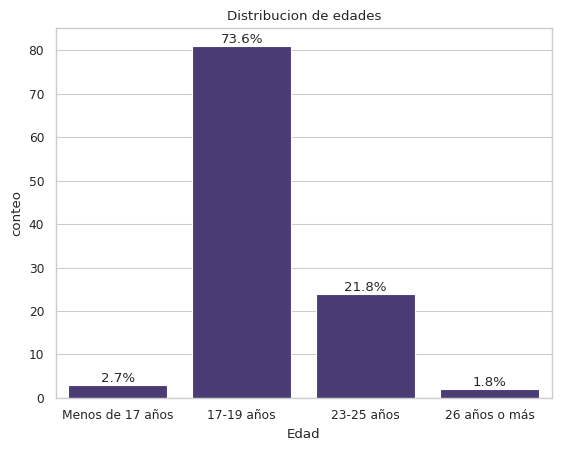

In [260]:
ax = sns.countplot(data=data, x='age')
add_percentage(ax, len(data))
plt.title("Distribucion de edades")
plt.xlabel("Edad")
plt.ylabel("conteo")

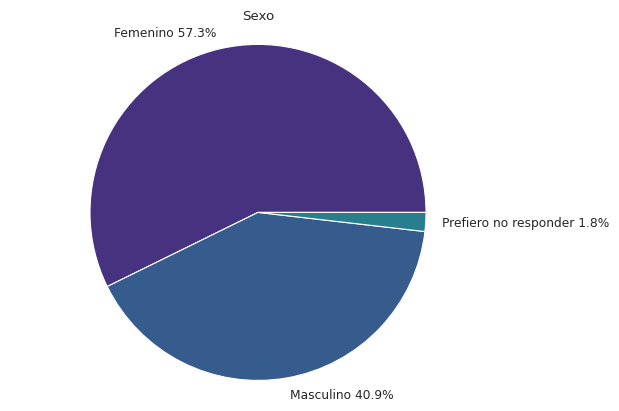

In [261]:
sex_counts = data['sex'].value_counts()

plt.pie(sex_counts, labels=get_tagged_percentages(sex_counts))
plt.title('Sexo')
plt.axis('equal')

plt.show()

Text(0, 0.5, 'conteo')

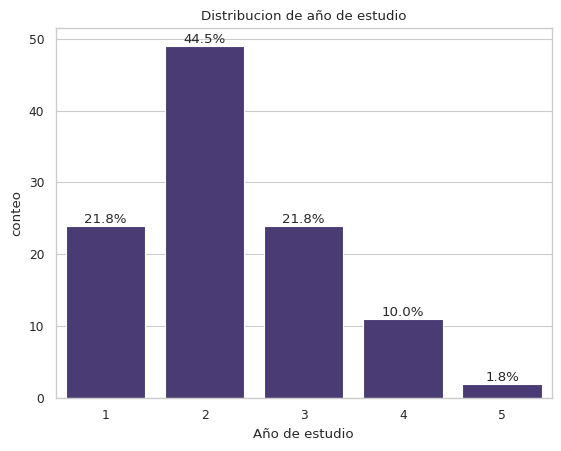

In [262]:
ax = sns.countplot(data=data, x='years_studying')
add_percentage(ax, len(data))
plt.title("Distribucion de año de estudio")
plt.xlabel("Año de estudio")
plt.ylabel("conteo")

Text(0.5, 0, 'Conteo')

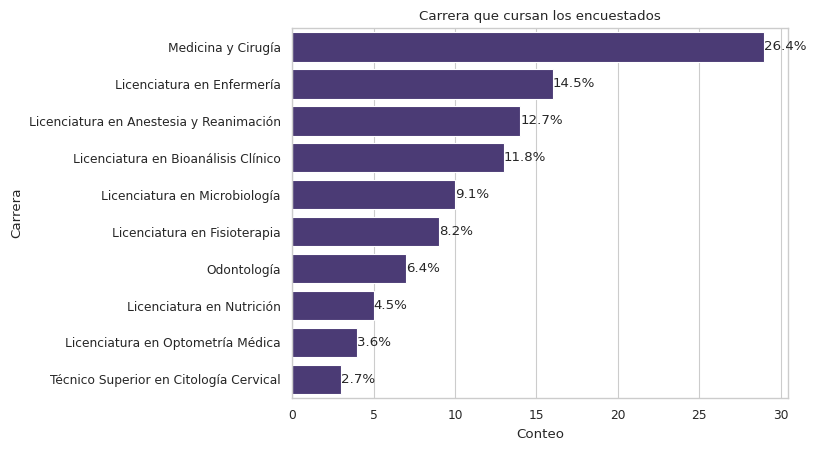

In [263]:
ax = sns.countplot(
    data=data,
    y='degree',
    order=data['degree'].value_counts().index
)
add_percentage(ax, len(data))
plt.title("Carrera que cursan los encuestados")
plt.ylabel("Carrera")
plt.xlabel("Conteo")

Text(0.5, 0, 'Conteo')

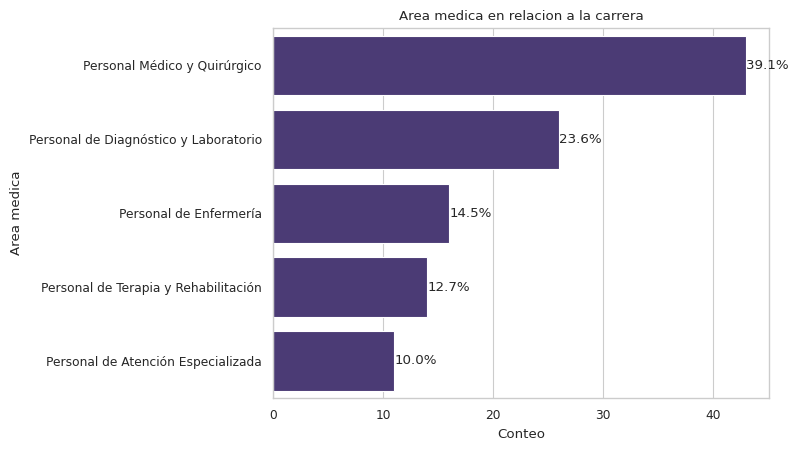

In [264]:
ax = sns.countplot(
    data=data,
    y='degree_category',
    order=data['degree_category'].value_counts().index
)
add_percentage(ax, len(data))
plt.title("Area medica en relacion a la carrera")
plt.ylabel("Area medica")
plt.xlabel("Conteo")

## Observación de Avances

Text(0, 0.5, 'conteo')

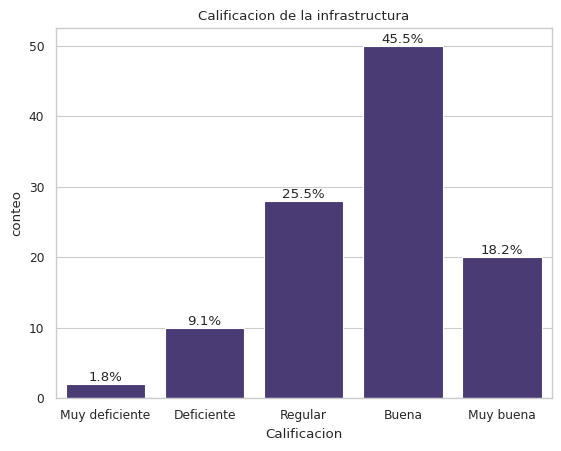

In [265]:
ax = sns.countplot(data=data, x='infrastructure_score')
add_percentage(ax, len(data))
plt.title("Calificacion de la infrastructura")
plt.xlabel("Calificacion")
plt.ylabel("conteo")

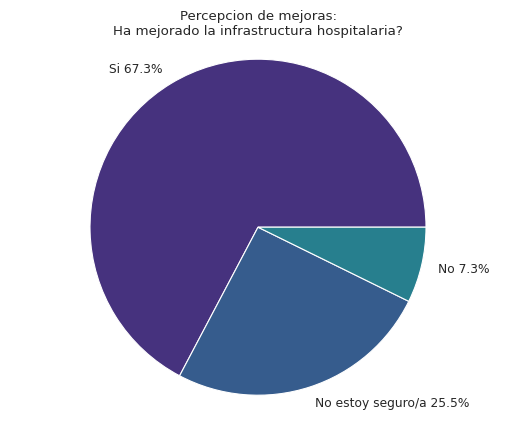

In [266]:
counts = data['notice_infrastructure_improvement'].value_counts()

plt.pie(counts, labels=get_tagged_percentages(counts))
plt.title('Percepcion de mejoras:\nHa mejorado la infrastructura hospitalaria?')
plt.axis('equal')

plt.show()

Text(0, 0.5, 'Frecuencia')

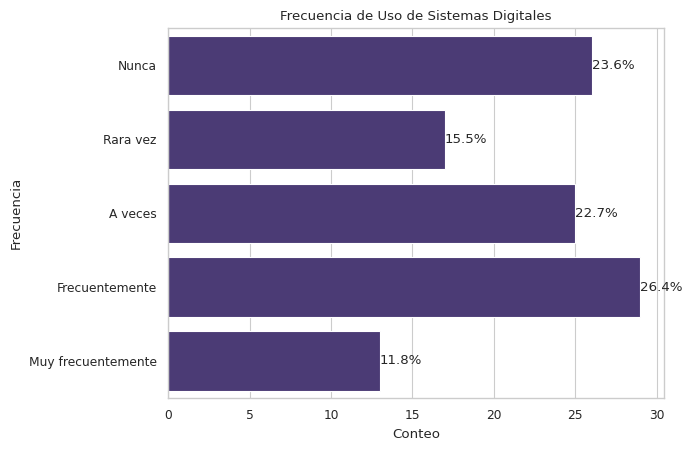

In [267]:
ax = sns.countplot(data=data, y='frecuency_digital_systems')
add_percentage(ax, len(data))
plt.title("Frecuencia de Uso de Sistemas Digitales")
plt.xlabel("Conteo")
plt.ylabel("Frecuencia")

Text(0, 0.5, 'Patologias')

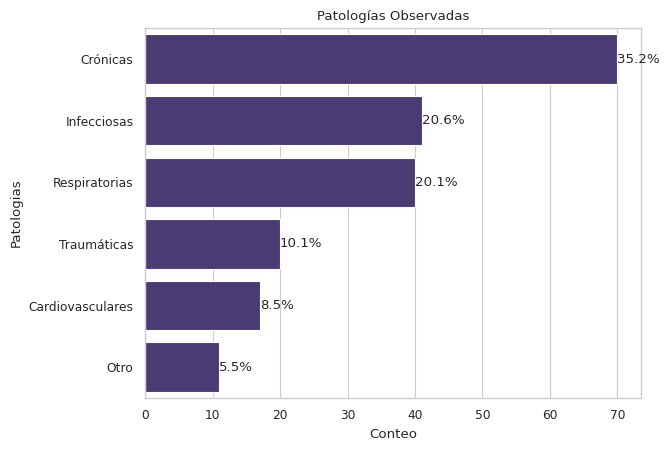

In [268]:
data_subset = data[["pathologies"]].explode('pathologies')
ax = sns.countplot(data=data_subset, y='pathologies',
                   order=data_subset["pathologies"].value_counts().index)
add_percentage(ax, len(data_subset))
plt.title("Patologías Observadas")
plt.xlabel("Conteo")
plt.ylabel("Patologias")

## Nivel de Conocimiento

Text(0, 0.5, 'Cambios en la infrastructura')

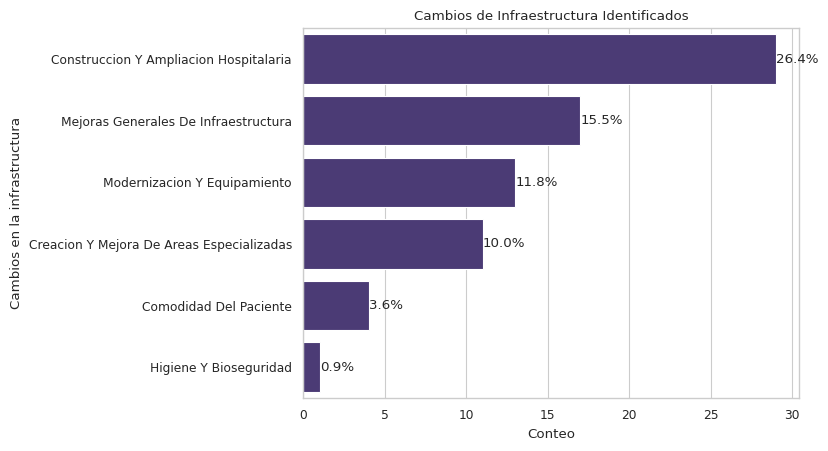

In [269]:
data_subset = data["infrastructure_changes_topic"].str.split(
    '_').str.join(' ').str.title()
ax = sns.countplot(y=data_subset, order=data_subset.value_counts().index)
add_percentage(ax, len(data_subset))
plt.title("Cambios de Infraestructura Identificados")
plt.xlabel("Conteo")
plt.ylabel("Cambios en la infrastructura")

Text(0, 0.5, 'Tecnologias')

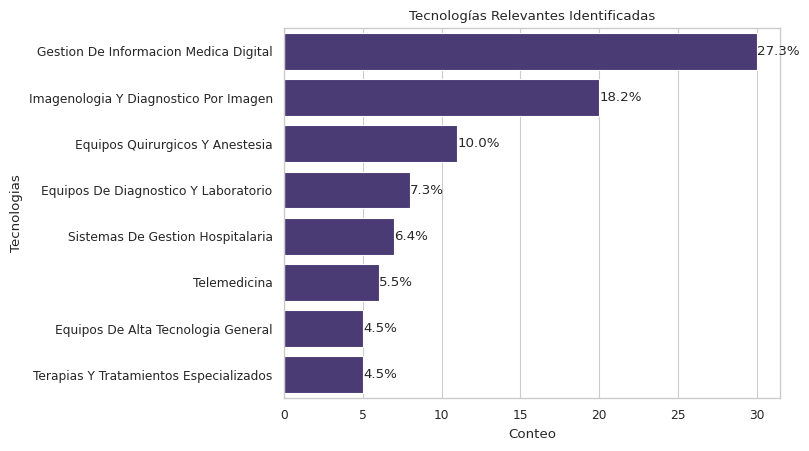

In [270]:
data_subset = data["most_important_technologies_topic"].str.split(
    '_').str.join(' ').str.title()
ax = sns.countplot(y=data_subset, order=data_subset.value_counts().index)
add_percentage(ax, len(data_subset))
plt.title("Tecnologías Relevantes Identificadas")
plt.xlabel("Conteo")
plt.ylabel("Tecnologias")

## Opinión y Valoración

Text(0.5, 0, 'Calificacion')

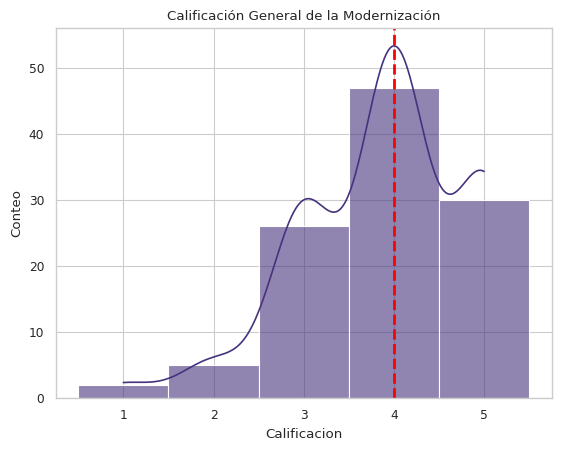

In [271]:
ax = sns.histplot(
    x=data["modernization_score"].astype('category'),
    kde=True,
    alpha=0.6
)

modernization_score_median = data["modernization_score"].median()
ax.axvline(
    x=modernization_score_median,
    color='red',
    linestyle='--',
    linewidth=2,
    label=f'Median: ${modernization_score_median:.2f}'
)

plt.title("Calificación General de la Modernización")
plt.ylabel("Conteo")
plt.xlabel("Calificacion")

Text(0.5, 22.71666666666666, 'La Modernizacion mejora la antencion?')

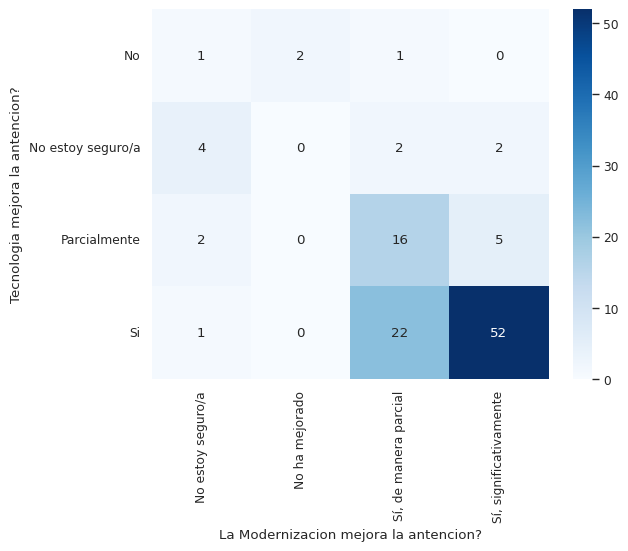

In [272]:
data_subset = pd.crosstab(
    data['modernization_improves_attention'],
    data["technology_improves_attention"]
)

sns.heatmap(
    data_subset,
    annot=True,
    fmt='d',
    cmap='Blues'
)

plt.ylabel("Tecnologia mejora la antencion?")
plt.xlabel("La Modernizacion mejora la antencion?")

Text(0.5, 0, 'Count')

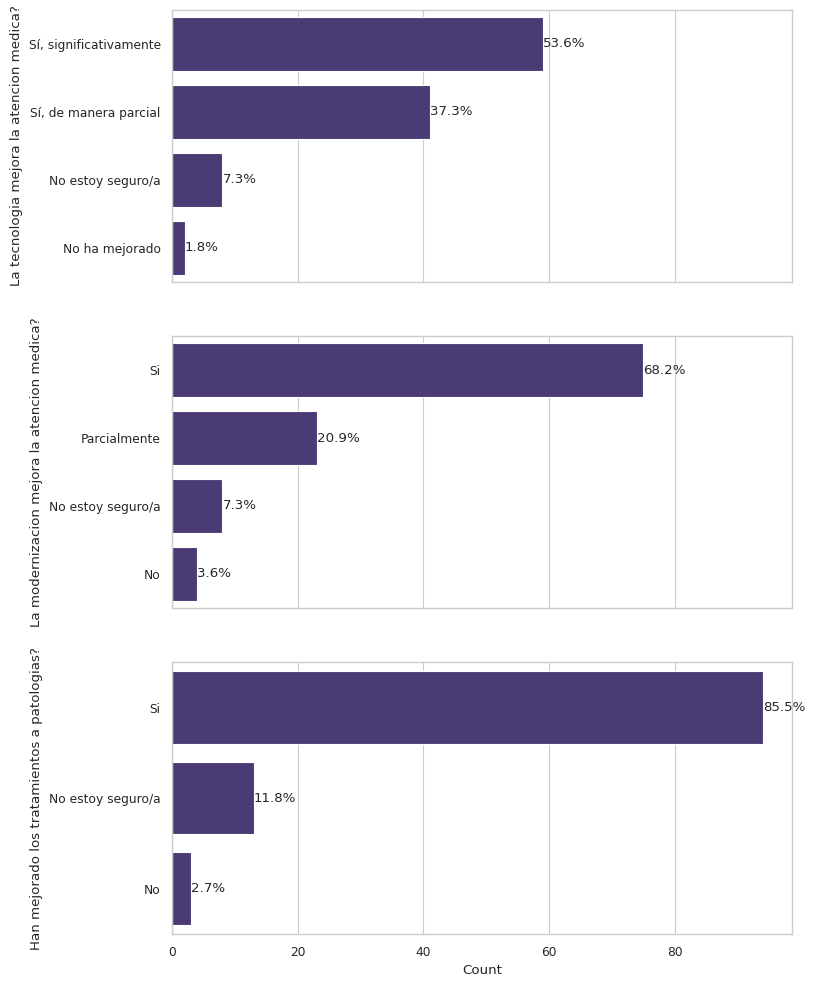

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12), sharex=True)

ax = sns.countplot(
    data=data,
    y='technology_improves_attention',
    order=data['technology_improves_attention'].value_counts().index,
    ax=axes[0]
)
add_percentage(ax, len(data))
ax.set_ylabel("La tecnologia mejora la atencion medica?")

ax = sns.countplot(
    data=data,
    y='modernization_improves_attention',
    order=data['modernization_improves_attention'].value_counts().index,
    ax=axes[1]
)
add_percentage(ax, len(data))
ax.set_ylabel("La modernizacion mejora la atencion medica?")


ax = sns.countplot(
    data=data,
    y='improved_pathologies_treatments',
    order=data['improved_pathologies_treatments'].value_counts().index,
    ax=axes[2]
)
add_percentage(ax, len(data))
ax.set_ylabel("Han mejorado los tratamientos a patologias?")


plt.xlabel("Count")

Text(0, 0.5, 'Aspecto')

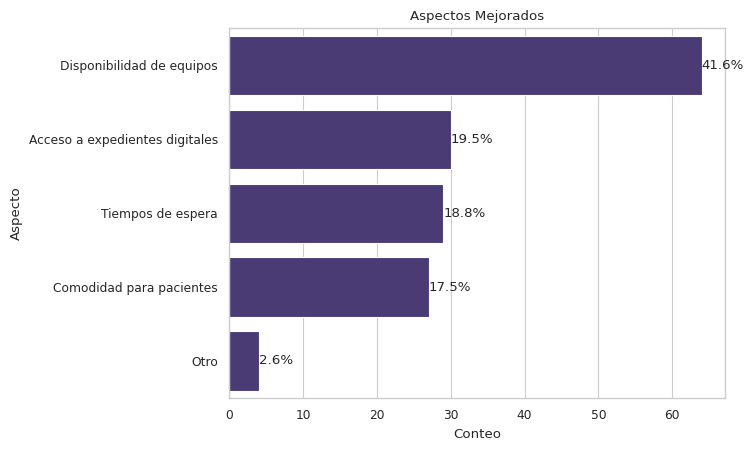

In [274]:
data_subset = data["improved_aspects"].explode()

ax = sns.countplot(y=data_subset, order=data_subset.value_counts().index)
add_percentage(ax, len(data_subset))
plt.title("Aspectos Mejorados")
plt.xlabel("Conteo")
plt.ylabel("Aspecto")

Text(0, 0.5, 'Desafio')

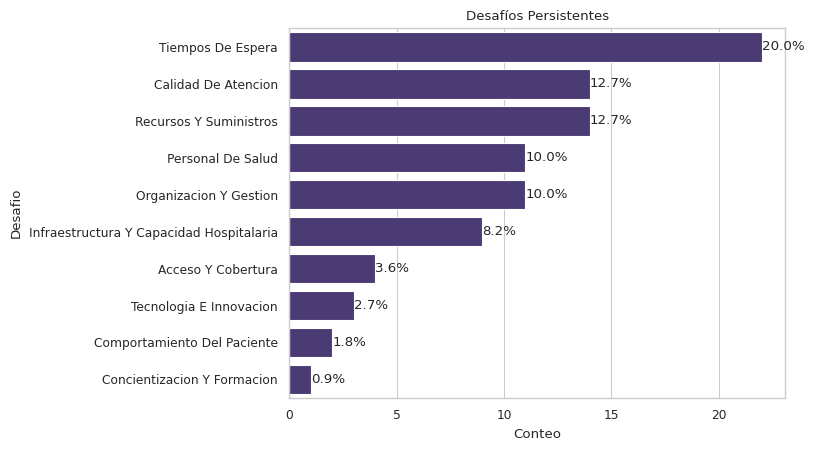

In [275]:
data_subset = data["challenges_topic"].str.replace('_', ' ').str.title()

ax = sns.countplot(y=data_subset, order=data_subset.value_counts().index)
add_percentage(ax, len(data_subset))
plt.title("Desafíos Persistentes")
plt.xlabel("Conteo")
plt.ylabel("Desafio")

Text(0, 0.5, 'Desafio')

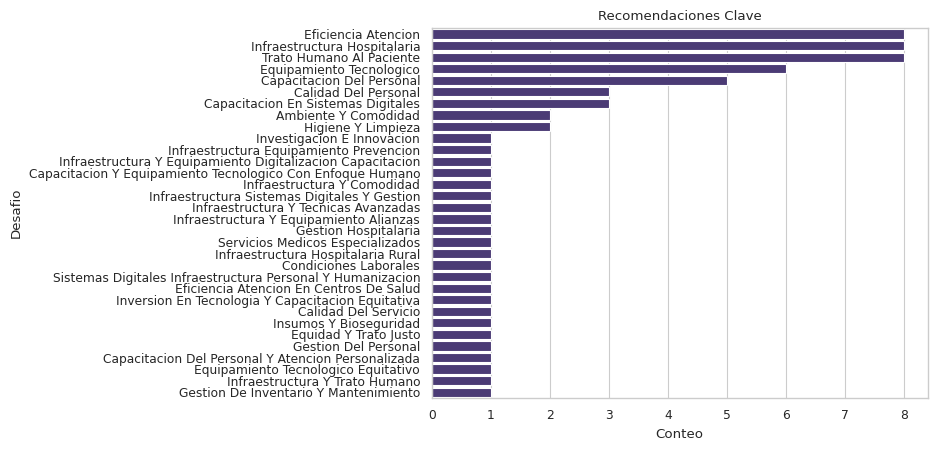

In [ ]:
top = data["recomendations_topic"].value_counts().head().index
data["recomendations_topic_agg"] = np.where(
    data["recomendations_topic"].isin(top), data["recomendations_topic"], "Otro")
# guardar el top 5 para luego
data_subset = data["recomendations_topic"].str.replace('_', ' ').str.title()

ax = sns.countplot(y=data_subset, order=data_subset.value_counts().index)
plt.title("Recomendaciones Clave")
plt.xlabel("Conteo")
plt.ylabel("Desafio")

Text(0.5, 0, 'Count')

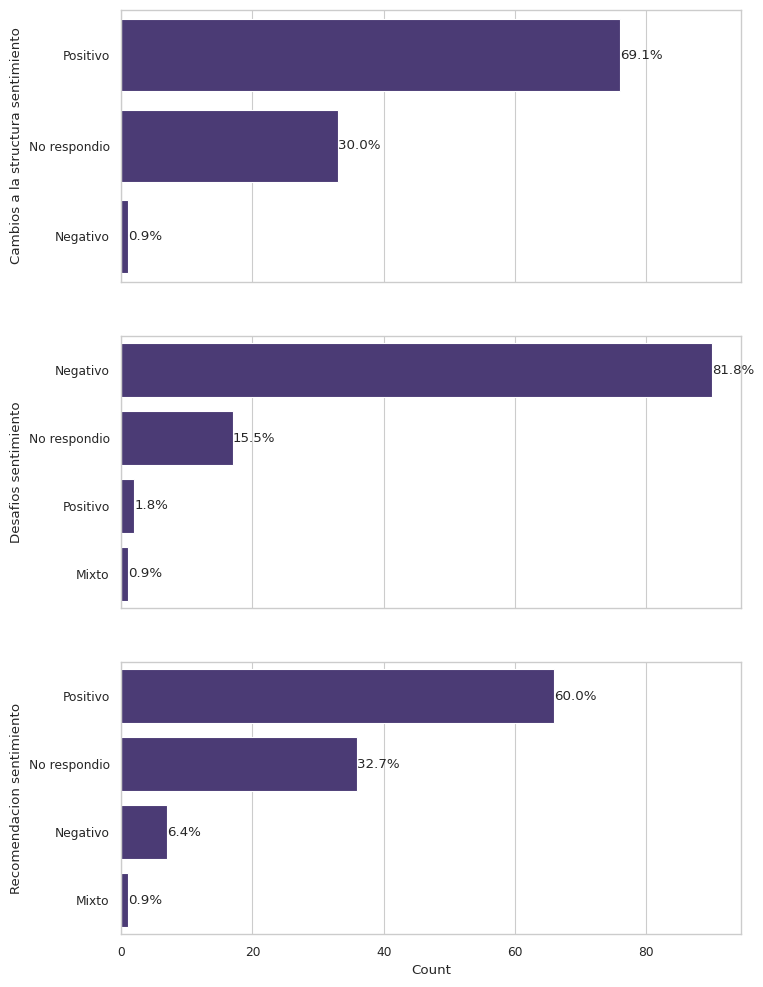

In [292]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 12), sharex=True)

sentiment_map = {
    'Non-Response': "No respondio",
    'Negative': "Negativo",
    'Positive': "Positivo",
    'Mixed': "Mixto"
}
data_subset = data.loc[:, ["infrastructure_changes_sentiment", "challenges_sentiment",
                           "recomendations_sentiment", "most_important_technologies_sentiment"]]
data_subset["infrastructure_changes_sentiment"] = data_subset["infrastructure_changes_sentiment"].astype('str').replace(sentiment_map)
data_subset["challenges_sentiment"] = data_subset["challenges_sentiment"].astype('str').replace(sentiment_map)
data_subset["recomendations_sentiment"] = data_subset["recomendations_sentiment"].astype('str').replace(sentiment_map)
data_subset["most_important_technologies_sentiment"] = data_subset["most_important_technologies_sentiment"].astype('str').replace(sentiment_map)

ax = sns.countplot(
    data=data_subset,
    y='infrastructure_changes_sentiment',
    order=data_subset['infrastructure_changes_sentiment'].value_counts().index,
    ax=axes[0]
)
add_percentage(ax, len(data_subset))
ax.set_ylabel("Cambios a la structura sentimiento")

ax = sns.countplot(
    data=data_subset,
    y='challenges_sentiment',
    order=data_subset['challenges_sentiment'].value_counts().index,
    ax=axes[1]
)
add_percentage(ax, len(data_subset))
ax.set_ylabel("Desafios sentimiento")

ax = sns.countplot(
    data=data_subset,
    y='recomendations_sentiment',
    order=data_subset['recomendations_sentiment'].value_counts().index,
    ax=axes[2]
)
add_percentage(ax, len(data_subset))
ax.set_ylabel("Recomendacion sentimiento")


plt.xlabel("Count")